In [ ]:
import pandas as pd
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
import seaborn as sns
from matplotlib import style
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

mpl.rcParams['figure.figsize']= (10,8)
mpl.rcParams['axes.grid']= False

In [ ]:
df=pd.read_csv('/content/train_dataframes.csv')

In [ ]:
#df = pd.read_csv('/content/Dataset_2.2.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39072 entries, 0 to 39071
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    39072 non-null  object 
 1   DEMAND      39072 non-null  float64
 2   week_X-2    39072 non-null  float64
 3   week_X-3    39072 non-null  float64
 4   week_X-4    39072 non-null  float64
 5   MA_X-4      39072 non-null  float64
 6   dayOfWeek   39072 non-null  int64  
 7   weekend     39072 non-null  int64  
 8   holiday     39072 non-null  int64  
 9   Holiday_ID  39072 non-null  int64  
 10  hourOfDay   39072 non-null  int64  
 11  T2M_toc     39072 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 3.6+ MB


In [ ]:
df['date'] = pd.to_datetime(df['datetime'], infer_datetime_format = True)  

In [ ]:
#extracting date and time
dataset = df
dataset["Month"] = pd.to_datetime(df["datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["datetime"]).dt.week
dataset["Hour"] = pd.to_datetime(df["datetime"]).dt.hour
dataset["day"] = pd.to_datetime(df["datetime"]).dt.day
dataset['timestamp'] = pd.to_datetime(df['datetime'])

# Create a dictionary to map the days of the week to numerical values
day_map = {
    'Sunday': 1,
    'Monday': 2,
    'Tuesday': 3,
    'Wednesday': 4,
    'Thursday': 5,
    'Friday': 6,
    'Saturday': 7
}

# Extract the day of the week from the timestamp column and map it to a numerical value
df['day_of_week'] = df['timestamp'].dt.day_name().map(day_map)
dataset = df.set_index("datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(5)

<ipython-input-6-799103cc83e7>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset["Week"] = pd.to_datetime(df["datetime"]).dt.week


,DEMAND,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,...,date,Month,Year,Date,Time,Week,Hour,day,timestamp,day_of_week
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-31 01:00:00,954.2018,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,...,2015-01-31 01:00:00,1,2015,2015-01-31,01:00:00,5,1,31,2015-01-31 01:00:00,7
2015-01-31 02:00:00,913.8660,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,...,2015-01-31 02:00:00,1,2015,2015-01-31,02:00:00,5,2,31,2015-01-31 02:00:00,7
2015-01-31 03:00:00,903.3637,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,...,2015-01-31 03:00:00,1,2015,2015-01-31,03:00:00,5,3,31,2015-01-31 03:00:00,7
2015-01-31 04:00:00,889.0806,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,...,2015-01-31 04:00:00,1,2015,2015-01-31,04:00:00,5,4,31,2015-01-31 04:00:00,7
2015-01-31 05:00:00,910.1472,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,...,2015-01-31 05:00:00,1,2015,2015-01-31,05:00:00,5,5,31,2015-01-31 05:00:00,7


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
      dtype=object)

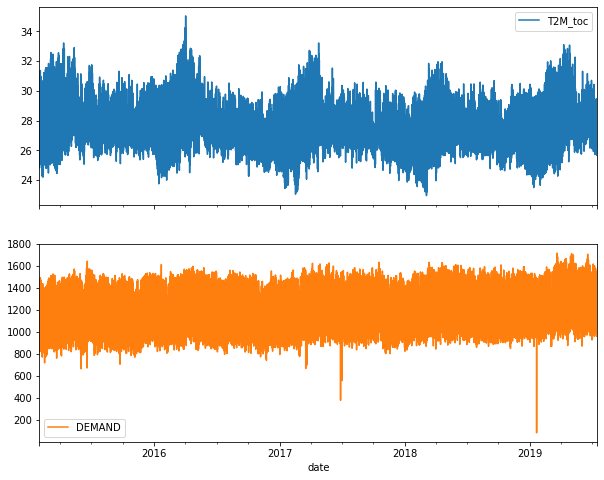

In [ ]:
df.set_index('date')[['T2M_toc','DEMAND']].plot(subplots = True)

In [ ]:
result = df
#result = df.loc[df['Value'] == 0]
new_kva = df['DEMAND']
new_kva.replace(to_replace = 0, value = new_kva.std(), inplace=True)

In [ ]:
df_input = result

In [ ]:
df_input = result[['DEMAND','T2M_toc', 'Hour','week_X-4','week_X-3','week_X-2','weekend','holiday']]

In [ ]:
q3 = df_input['DEMAND'].quantile(0.75)
iqr = df_input['DEMAND'].quantile(0.75) - df_input['DEMAND'].quantile(0.25)
threshold = q3 + 1.5 * iqr

In [ ]:
q1 = df_input['DEMAND'].quantile(0.25)
iqr = df_input['DEMAND'].quantile(0.75) - df_input['DEMAND'].quantile(0.25)
thresholdL = q1 - 1 * iqr

In [ ]:
iqr,q1

(314.82040000000006, 1012.635925)

In [ ]:
threshold

1799.6869250000002

In [ ]:
df_input['DEMAND'] = df_input['DEMAND'].clip(upper=threshold)
df_input['DEMAND'] = df_input['DEMAND'].clip(lower=thresholdL)

<ipython-input-15-a96fdbc66ec3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['DEMAND'] = df_input['DEMAND'].clip(upper=threshold)
<ipython-input-15-a96fdbc66ec3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_input['DEMAND'] = df_input['DEMAND'].clip(lower=thresholdL)


In [ ]:
thresholdL

697.815525

In [ ]:
df_input

,DEMAND,T2M_toc,Hour,week_X-4,week_X-3,week_X-2,weekend,holiday
0,954.2018,25.308496,1,970.3450,906.9580,962.2865,1,0
1,913.8660,25.141443,2,912.1755,863.5135,933.3221,1,0
2,903.3637,25.006738,3,900.2688,848.4447,903.9817,1,0
3,889.0806,24.899713,4,889.9538,839.8821,900.9995,1,0
4,910.1472,24.821558,5,893.6865,847.1073,904.3481,1,0
...,...,...,...,...,...,...,...,...
39067,1328.6012,26.826990,20,1513.6304,1252.4212,1328.7539,0,0
39068,1305.1523,26.533838,21,1468.9324,1205.0356,1298.7222,0,0
39069,1236.2234,26.349878,22,1410.0446,1148.6463,1232.6149,0,0
39070,1153.1672,26.210352,23,1339.3879,1101.7972,1173.4053,0,0


In [ ]:
df_input.describe()

,DEMAND,T2M_toc,Hour,week_X-4,week_X-3,week_X-2,weekend,holiday
count,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000
mean,1179.942216,27.391452,11.500000,1177.097007,1177.971969,1178.342416,0.286215,0.062654
std,192.762652,1.682500,6.922275,193.116684,193.236768,193.149594,0.451997,0.242342
min,697.815525,22.953455,0.000000,85.192500,85.192500,85.192500,0.000000,0.000000
25%,1012.635925,26.158678,5.750000,1009.655150,1010.398350,1010.838075,0.000000,0.000000
50%,1168.634250,27.117578,11.500000,1165.453050,1166.670650,1167.031650,0.000000,0.000000
75%,1327.456325,28.539148,17.250000,1324.553050,1325.412050,1325.721950,1.000000,0.000000
max,1719.043900,35.039575,23.000000,1719.043900,1719.043900,1719.043900,1.000000,1.000000


In [ ]:
new_kva = df_input['DEMAND']
new_kva.replace(to_replace = 0, value = new_kva.std(), inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df_input.describe()

,DEMAND,T2M_toc,Hour,week_X-4,week_X-3,week_X-2,weekend,holiday
count,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000,39072.000000
mean,1179.942216,27.391452,11.500000,1177.097007,1177.971969,1178.342416,0.286215,0.062654
std,192.762652,1.682500,6.922275,193.116684,193.236768,193.149594,0.451997,0.242342
min,697.815525,22.953455,0.000000,85.192500,85.192500,85.192500,0.000000,0.000000
25%,1012.635925,26.158678,5.750000,1009.655150,1010.398350,1010.838075,0.000000,0.000000
50%,1168.634250,27.117578,11.500000,1165.453050,1166.670650,1167.031650,0.000000,0.000000
75%,1327.456325,28.539148,17.250000,1324.553050,1325.412050,1325.721950,1.000000,0.000000
max,1719.043900,35.039575,23.000000,1719.043900,1719.043900,1719.043900,1.000000,1.000000


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


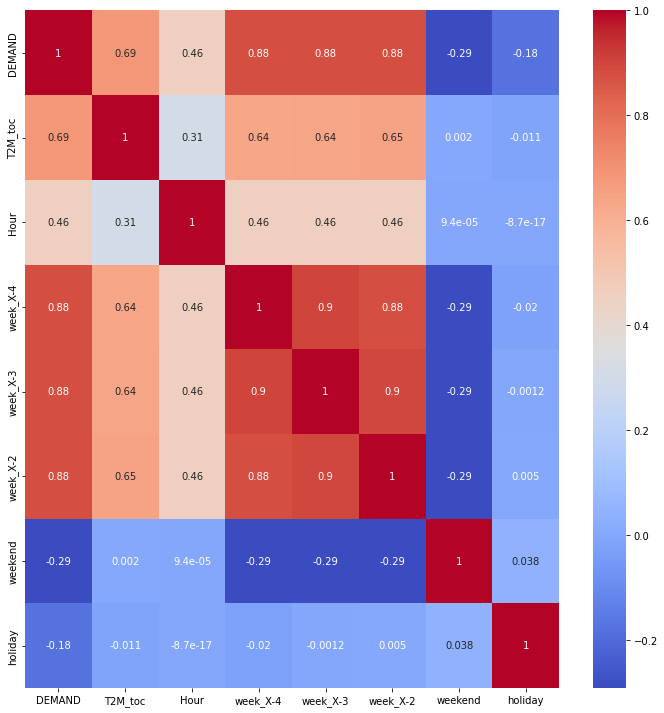

In [ ]:
# Create a FacetGrid object with the desired height
g = sns.FacetGrid(df, size = 10)

# Load a sample dataset


# Compute the correlation matrix
corr = df_input.corr()

# Generate a heatmap from the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm")

# Show the plot
plt.show()

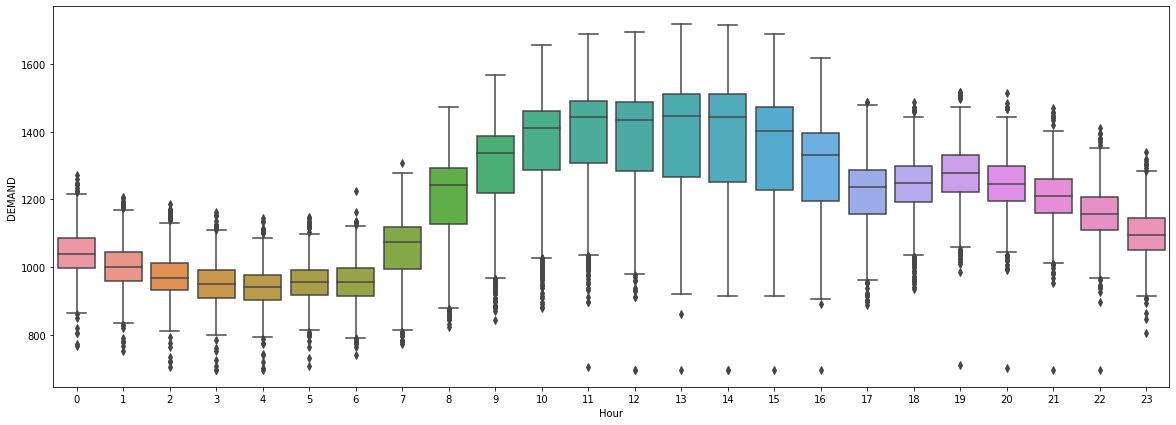

In [ ]:
fig = plt.figure(figsize=(20, 7))
sns.boxplot(x="Hour", y="DEMAND", data=df_input)
plt.xlabel("Hour") # set the font size for the x-axis label
plt.show()

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
features= data_scaled
target = data_scaled[:,0]

In [ ]:
TimeseriesGenerator(features, target , length= 96 , sampling_rate =2 , batch_size=64)[0]

(array([[[0.25105675, 0.19485504, 0.04347826, ..., 0.53682605,
          1.        , 0.        ],
         [0.20127542, 0.16988774, 0.13043478, ..., 0.50114056,
          1.        , 0.        ],
         [0.20791792, 0.15456598, 0.2173913 , ..., 0.50136481,
          1.        , 0.        ],
         ...,
         [0.50270771, 0.30075144, 0.82608696, ..., 0.68286675,
          0.        , 0.        ],
         [0.42638315, 0.2660881 , 0.91304348, ..., 0.64754469,
          0.        , 0.        ],
         [0.30301839, 0.24037845, 1.        , ..., 0.55368401,
          0.        , 0.        ]],
 
        [[0.21155941, 0.18103313, 0.08695652, ..., 0.51909837,
          1.        , 0.        ],
         [0.18728923, 0.16103253, 0.17391304, ..., 0.4993153 ,
          1.        , 0.        ],
         [0.21969442, 0.15528055, 0.26086957, ..., 0.50635909,
          1.        , 0.        ],
         ...,
         [0.47319061, 0.27790515, 0.86956522, ..., 0.65397649,
          0.        , 0.

In [ ]:
x_train , x_test , y_train, y_test = train_test_split(features, target, test_size= 0.20 , random_state= 123, shuffle = False)

In [ ]:
x_train.shape

(31257, 8)

In [ ]:
x_test.shape

(7815, 8)

In [ ]:
win_length = 32
batch_size =32
sr = 1
num_features = 8
train_generator = TimeseriesGenerator(x_train , y_train, length = win_length , sampling_rate =sr , batch_size = batch_size)
test_generator = TimeseriesGenerator(x_test , y_test, length = win_length , sampling_rate =sr , batch_size = batch_size)

In [ ]:
train_generator[0]

(array([[[0.25105675, 0.19485504, 0.04347826, ..., 0.53682605,
          1.        , 0.        ],
         [0.21155941, 0.18103313, 0.08695652, ..., 0.51909837,
          1.        , 0.        ],
         [0.20127542, 0.16988774, 0.13043478, ..., 0.50114056,
          1.        , 0.        ],
         ...,
         [0.12186351, 0.17734157, 0.26086957, ..., 0.42848609,
          1.        , 0.        ],
         [0.13781342, 0.25370798, 0.30434783, ..., 0.42777605,
          1.        , 0.        ],
         [0.19742585, 0.35177432, 0.34782609, ..., 0.46816687,
          1.        , 0.        ]],
 
        [[0.21155941, 0.18103313, 0.08695652, ..., 0.51909837,
          1.        , 0.        ],
         [0.20127542, 0.16988774, 0.13043478, ..., 0.50114056,
          1.        , 0.        ],
         [0.18728923, 0.16103253, 0.17391304, ..., 0.4993153 ,
          1.        , 0.        ],
         ...,
         [0.13781342, 0.25370798, 0.30434783, ..., 0.42777605,
          1.        , 0.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, input_shape = (win_length, num_features), return_sequences =True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences= True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences= False)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [ ]:
from tensorflow.python import losses
early_Stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience =10, 
                                                  mode ='min')
model.compile(loss= tf.losses.MeanSquaredError(), 
              optimizer = tf.optimizers.Adamax(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.FalseNegatives(),
                       tf.metrics.MeanAbsoluteError()] )

history = model.fit_generator(train_generator, epochs = 50,
                              validation_data = test_generator,
                              shuffle = False,
                              callbacks= [early_Stopping])

model.save_weights('model_weights.h5', save_format='h5')

<ipython-input-76-d3195b9c9ab1>:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, epochs = 50,


Epoch 1/50
976/976 [==============================] - 32s 20ms/step - loss: 0.0091 - binary_accuracy: 1.2810e-04 - false_negatives_2: 19129.0000 - mean_absolute_error: 0.0722 - val_loss: 0.0065 - val_binary_accuracy: 7.7091e-04 - val_false_negatives_2: 4681.0000 - val_mean_absolute_error: 0.0654
Epoch 2/50
976/976 [==============================] - 19s 19ms/step - loss: 0.0039 - binary_accuracy: 1.6013e-04 - false_negatives_2: 18817.0000 - mean_absolute_error: 0.0483 - val_loss: 0.0050 - val_binary_accuracy: 7.7091e-04 - val_false_negatives_2: 4562.0000 - val_mean_absolute_error: 0.0566
Epoch 3/50
976/976 [==============================] - 18s 19ms/step - loss: 0.0032 - binary_accuracy: 1.6013e-04 - false_negatives_2: 18758.0000 - mean_absolute_error: 0.0434 - val_loss: 0.0051 - val_binary_accuracy: 7.7091e-04 - val_false_negatives_2: 4532.0000 - val_mean_absolute_error: 0.0578
Epoch 4/50
976/976 [==============================] - 17s 18ms/step - loss: 0.0027 - binary_accuracy: 1.6013e

In [ ]:
model.evaluate_generator(test_generator, verbose =0)

<ipython-input-77-bbe713c2d124>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(test_generator, verbose =0)


[0.00042791920714080334, 0.0007709109340794384, 3760.0, 0.014889474958181381]

In [ ]:
predictions = model.predict_generator(test_generator)

<ipython-input-78-9068eb02ed61>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


In [ ]:
predictions.shape[0]

7783

In [ ]:
predictions

array([[0.40531722],
       [0.45374712],
       [0.45016095],
       ...,
       [0.5266859 ],
       [0.45215818],
       [0.37586606]], dtype=float32)

In [ ]:
y_test

array([0.6454887 , 0.65865275, 0.64780904, ..., 0.52721594, 0.44588623,
       0.38438687])

In [ ]:
x_test

array([[0.6454887 , 0.44430585, 0.43478261, ..., 0.79513431, 1.        ,
        0.        ],
       [0.65865275, 0.47068211, 0.47826087, ..., 0.81184672, 1.        ,
        0.        ],
       [0.64780904, 0.4877335 , 0.52173913, ..., 0.79838931, 1.        ,
        0.        ],
       ...,
       [0.52721594, 0.28101849, 0.95652174, ..., 0.70228076, 0.        ,
        0.        ],
       [0.44588623, 0.26947414, 1.        , ..., 0.66604148, 0.        ,
        0.        ],
       [0.38438687, 0.26122998, 0.        , ..., 0.62396501, 0.        ,
        0.        ]])

In [ ]:
x_test[:,1:][win_length:]

array([[0.42304526, 0.7826087 , 0.64367965, ..., 0.66936008, 1.        ,
        0.        ],
       [0.38442018, 0.82608696, 0.67665915, ..., 0.7163179 , 1.        ,
        0.        ],
       [0.3583545 , 0.86956522, 0.67561518, ..., 0.72271768, 1.        ,
        0.        ],
       ...,
       [0.28101849, 0.95652174, 0.81087674, ..., 0.70228076, 0.        ,
        0.        ],
       [0.26947414, 1.        , 0.76763125, ..., 0.66604148, 0.        ,
        0.        ],
       [0.26122998, 0.        , 0.71854295, ..., 0.62396501, 0.        ,
        0.        ]])

In [ ]:
df_pred = pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis = 1)

In [ ]:
rev_trans = scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[1.11173697e+03, 2.80664307e+01, 1.80000000e+01, ...,
        1.17882740e+03, 1.00000000e+00, 0.00000000e+00],
       [1.16119496e+03, 2.75996033e+01, 1.90000000e+01, ...,
        1.25554950e+03, 1.00000000e+00, 0.00000000e+00],
       [1.15753266e+03, 2.72845703e+01, 2.00000000e+01, ...,
        1.26600580e+03, 1.00000000e+00, 0.00000000e+00],
       ...,
       [1.23568210e+03, 2.63498779e+01, 2.20000000e+01, ...,
        1.23261490e+03, 0.00000000e+00, 0.00000000e+00],
       [1.15957229e+03, 2.62103516e+01, 2.30000000e+01, ...,
        1.17340530e+03, 0.00000000e+00, 0.00000000e+00],
       [1.08166061e+03, 2.61107117e+01, 0.00000000e+00, ...,
        1.10465860e+03, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
df_final = df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

DEMAND      7783
T2M_toc     7783
Hour        7783
week_X-4    7783
week_X-3    7783
week_X-2    7783
weekend     7783
holiday     7783
dtype: int64

In [ ]:
df_final['App_Pred']= rev_trans[:,0]

<ipython-input-89-8e8b50b2bf2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['App_Pred']= rev_trans[:,0]


In [ ]:
df_final

,DEMAND,T2M_toc,Hour,week_X-4,week_X-3,week_X-2,weekend,holiday,App_Pred
31289,1103.4517,28.066431,18,1136.8694,1158.9886,1178.8274,1,0,1111.736968
31290,1156.9947,27.599603,19,1190.7530,1226.3106,1255.5495,1,0,1161.194963
31291,1162.0413,27.284570,20,1189.0473,1232.7610,1266.0058,1,0,1157.532661
31292,1136.5901,27.050989,21,1164.9788,1211.3915,1267.9374,1,0,1142.098262
31293,1080.4411,26.825189,22,1115.7039,1171.1541,1193.1623,1,0,1099.984228
...,...,...,...,...,...,...,...,...,...
39067,1328.6012,26.826990,20,1513.6304,1252.4212,1328.7539,0,0,1315.717268
39068,1305.1523,26.533838,21,1468.9324,1205.0356,1298.7222,0,0,1273.325180
39069,1236.2234,26.349878,22,1410.0446,1148.6463,1232.6149,0,0,1235.682104
39070,1153.1672,26.210352,23,1339.3879,1101.7972,1173.4053,0,0,1159.572291


<AxesSubplot:>

<Figure size 1440x504 with 0 Axes>

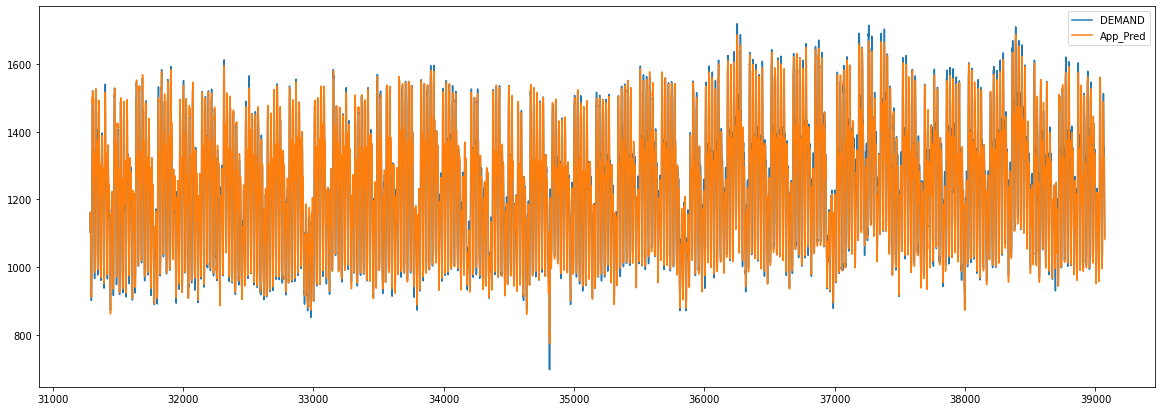

In [ ]:
fig = plt.figure(figsize=(20, 7))
df_final[['DEMAND','App_Pred']].plot(figsize=(20, 7))

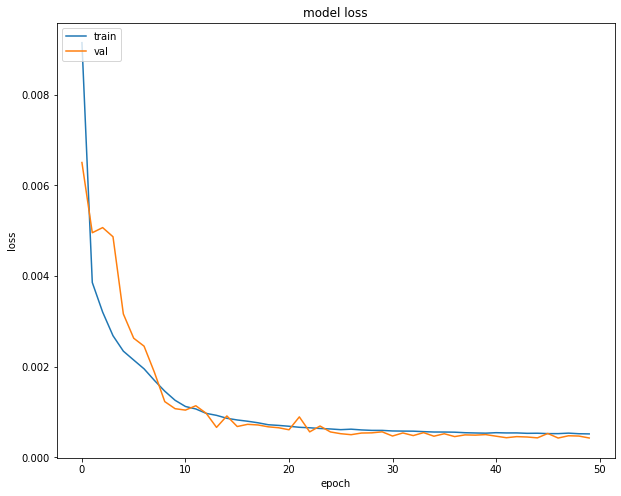

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
df_final.to_csv('kagglelayerMax.csv', index=False)

In [ ]:
import math
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error
rmse=math.sqrt(mean_squared_error(df_final['DEMAND'], df_final['App_Pred']))
# calculate mean absolute error
mae = mean_absolute_error(df_final['DEMAND'], df_final['App_Pred'])
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("MAPE:", mean_absolute_percentage_error(df_final['DEMAND'], df_final['App_Pred'])*100, "%")
r2 = r2_score(df_final['DEMAND'], df_final['App_Pred'])
print("R-squared:", r2)

Mean Absolute Error: 15.205551109835131
Root Mean Squared Error: 21.125340079868145
MAPE: 1.240217018073549 %
R-squared: 0.9872188763940127
